In [34]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import pickle
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('Dataset/dataset.csv')

print("Data Head:")
data.head()

print("Data Shape:")
data.shape

print("Data Description:")
data.describe()

Data Head:


,attendance,cgpa,avg_current_grade,certificates,internships,department,year,gender,residence,school_type,extra_curricular,library_usage,project_involvement,activity_score,gpa_sem1,gpa_sem2,grade_trend,risk_level
0,88,8.24,5.71,3.36,4,ME,3rd,F,Rural,Private,3,9,0,3.68,5.69,7.28,1.59,0
1,78,6.37,6.18,5.43,6,EE,2nd,F,Rural,Private,1,23,1,5.72,7.43,6.86,-0.57,0
2,64,5.89,6.79,1.92,4,ME,1st,M,Urban,Government,5,7,1,2.96,9.23,5.57,-3.66,1
3,92,6.47,9.87,5.37,6,IT,3rd,F,Rural,Private,5,5,1,5.68,5.50,6.15,0.65,0
4,57,5.57,5.03,2.79,2,IT,1st,F,Urban,Government,10,19,1,2.40,8.39,6.02,-2.37,2


Data Shape:


(5786, 18)

Data Description:


,attendance,cgpa,avg_current_grade,certificates,internships,extra_curricular,library_usage,project_involvement,activity_score,gpa_sem1,gpa_sem2,grade_trend,risk_level
count,5786.000000,5786.000000,5786.000000,5786.000000,5786.000000,5786.000000,5786.000000,5786.000000,5786.000000,5786.000000,5786.000000,5786.000000,5786.000000
mean,74.697891,7.482510,7.009679,4.955351,5.017283,5.032665,12.064639,0.508296,4.986229,7.522615,7.498894,-0.023721,0.506049
std,14.350158,1.445874,1.723953,2.882993,3.405224,3.156008,7.243223,0.499974,2.223351,1.441467,1.437373,2.059065,0.626177
min,50.000000,5.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000,-4.920000,0.000000
25%,62.000000,6.250000,5.540000,2.450000,2.000000,2.000000,6.000000,0.000000,3.350000,6.290000,6.280000,-1.510000,0.000000
50%,75.000000,7.500000,7.010000,4.940000,6.000000,5.000000,12.000000,1.000000,4.960000,7.550000,7.470000,-0.020000,0.000000
75%,87.000000,8.730000,8.470000,7.410000,8.000000,8.000000,18.000000,1.000000,6.590000,8.780000,8.750000,1.460000,1.000000
max,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,24.000000,1.000000,10.000000,10.000000,10.000000,4.940000,2.000000


In [3]:
data.isnull().sum()

attendance             0
cgpa                   0
avg_current_grade      0
certificates           0
internships            0
department             0
year                   0
gender                 0
residence              0
school_type            0
extra_curricular       0
library_usage          0
project_involvement    0
activity_score         0
gpa_sem1               0
gpa_sem2               0
grade_trend            0
risk_level             0
dtype: int64

In [4]:
data.head()

,attendance,cgpa,avg_current_grade,certificates,internships,department,year,gender,residence,school_type,extra_curricular,library_usage,project_involvement,activity_score,gpa_sem1,gpa_sem2,grade_trend,risk_level
0,88,8.24,5.71,3.36,4,ME,3rd,F,Rural,Private,3,9,0,3.68,5.69,7.28,1.59,0
1,78,6.37,6.18,5.43,6,EE,2nd,F,Rural,Private,1,23,1,5.72,7.43,6.86,-0.57,0
2,64,5.89,6.79,1.92,4,ME,1st,M,Urban,Government,5,7,1,2.96,9.23,5.57,-3.66,1
3,92,6.47,9.87,5.37,6,IT,3rd,F,Rural,Private,5,5,1,5.68,5.50,6.15,0.65,0
4,57,5.57,5.03,2.79,2,IT,1st,F,Urban,Government,10,19,1,2.40,8.39,6.02,-2.37,2


In [5]:
features = data.drop(columns=['department', 'year', 'gender', 'residence', 'school_type', 'risk_level', 'grade_trend', 'avg_current_grade' ])

In [6]:
features.shape

(5786, 10)

In [7]:
features.isnull().sum()

attendance             0
cgpa                   0
certificates           0
internships            0
extra_curricular       0
library_usage          0
project_involvement    0
activity_score         0
gpa_sem1               0
gpa_sem2               0
dtype: int64

In [8]:
features.head()

,attendance,cgpa,certificates,internships,extra_curricular,library_usage,project_involvement,activity_score,gpa_sem1,gpa_sem2
0,88,8.24,3.36,4,3,9,0,3.68,5.69,7.28
1,78,6.37,5.43,6,1,23,1,5.72,7.43,6.86
2,64,5.89,1.92,4,5,7,1,2.96,9.23,5.57
3,92,6.47,5.37,6,5,5,1,5.68,5.50,6.15
4,57,5.57,2.79,2,10,19,1,2.40,8.39,6.02


In [9]:
features = ((features - features.min()) / (features.max() - features.min())) * 9 + 1

In [10]:
features.describe()

,attendance,cgpa,certificates,internships,extra_curricular,library_usage,project_involvement,activity_score,gpa_sem1,gpa_sem2
count,5786.000000,5786.000000,5786.000000,5786.000000,5786.000000,5786.000000,5786.000000,5786.000000,5786.000000,5786.000000
mean,5.536347,5.468517,5.459816,5.515555,5.529399,5.524240,5.574663,5.487606,5.540707,5.498009
std,2.635743,2.602573,2.594694,3.064702,2.840407,2.716208,4.499769,2.001016,2.594641,2.587272
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.204082,3.250000,3.205000,2.800000,2.800000,3.250000,1.000000,4.015000,3.322000,3.304000
50%,5.591837,5.500000,5.446000,6.400000,5.500000,5.500000,10.000000,5.464000,5.590000,5.446000
75%,7.795918,7.714000,7.669000,8.200000,8.200000,7.750000,10.000000,6.931000,7.804000,7.750000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [11]:
features['project_involvement'].value_counts()

project_involvement
10.0    2941
1.0     2845
Name: count, dtype: int64

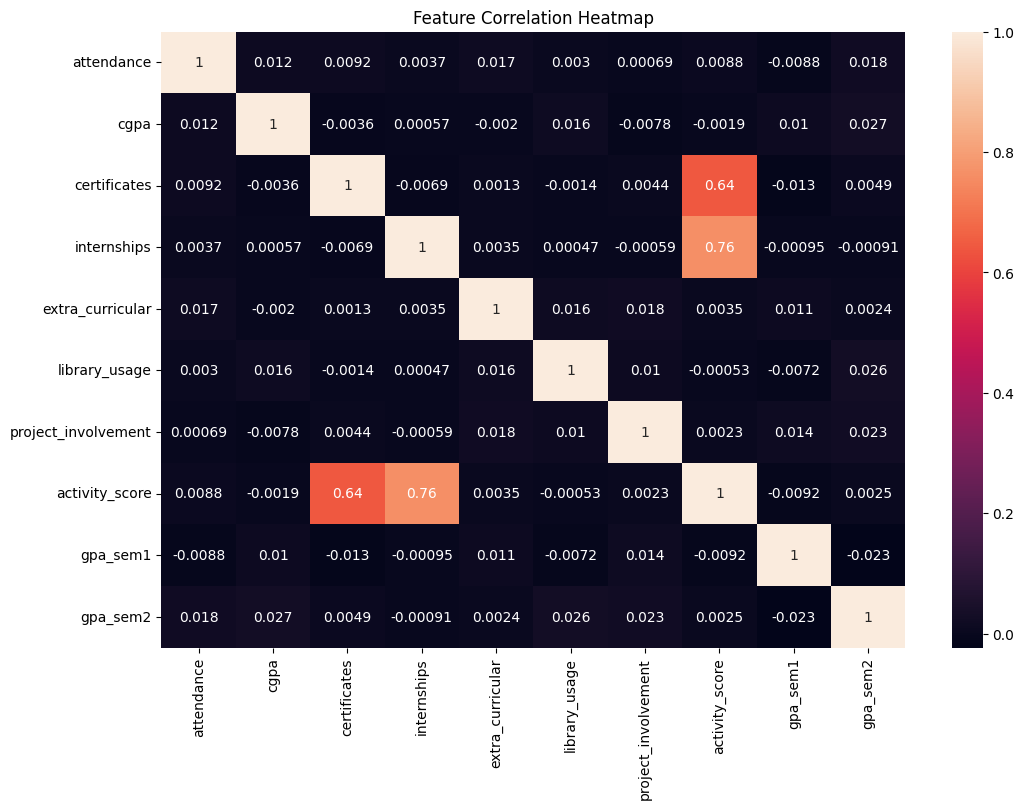

In [12]:
plt.figure(figsize=(12, 8))
sns.heatmap(features.corr(), annot=True);
plt.title("Feature Correlation Heatmap")
# plt.savefig("Feature Correlation Heatmap", dpi = 300)
plt.show();

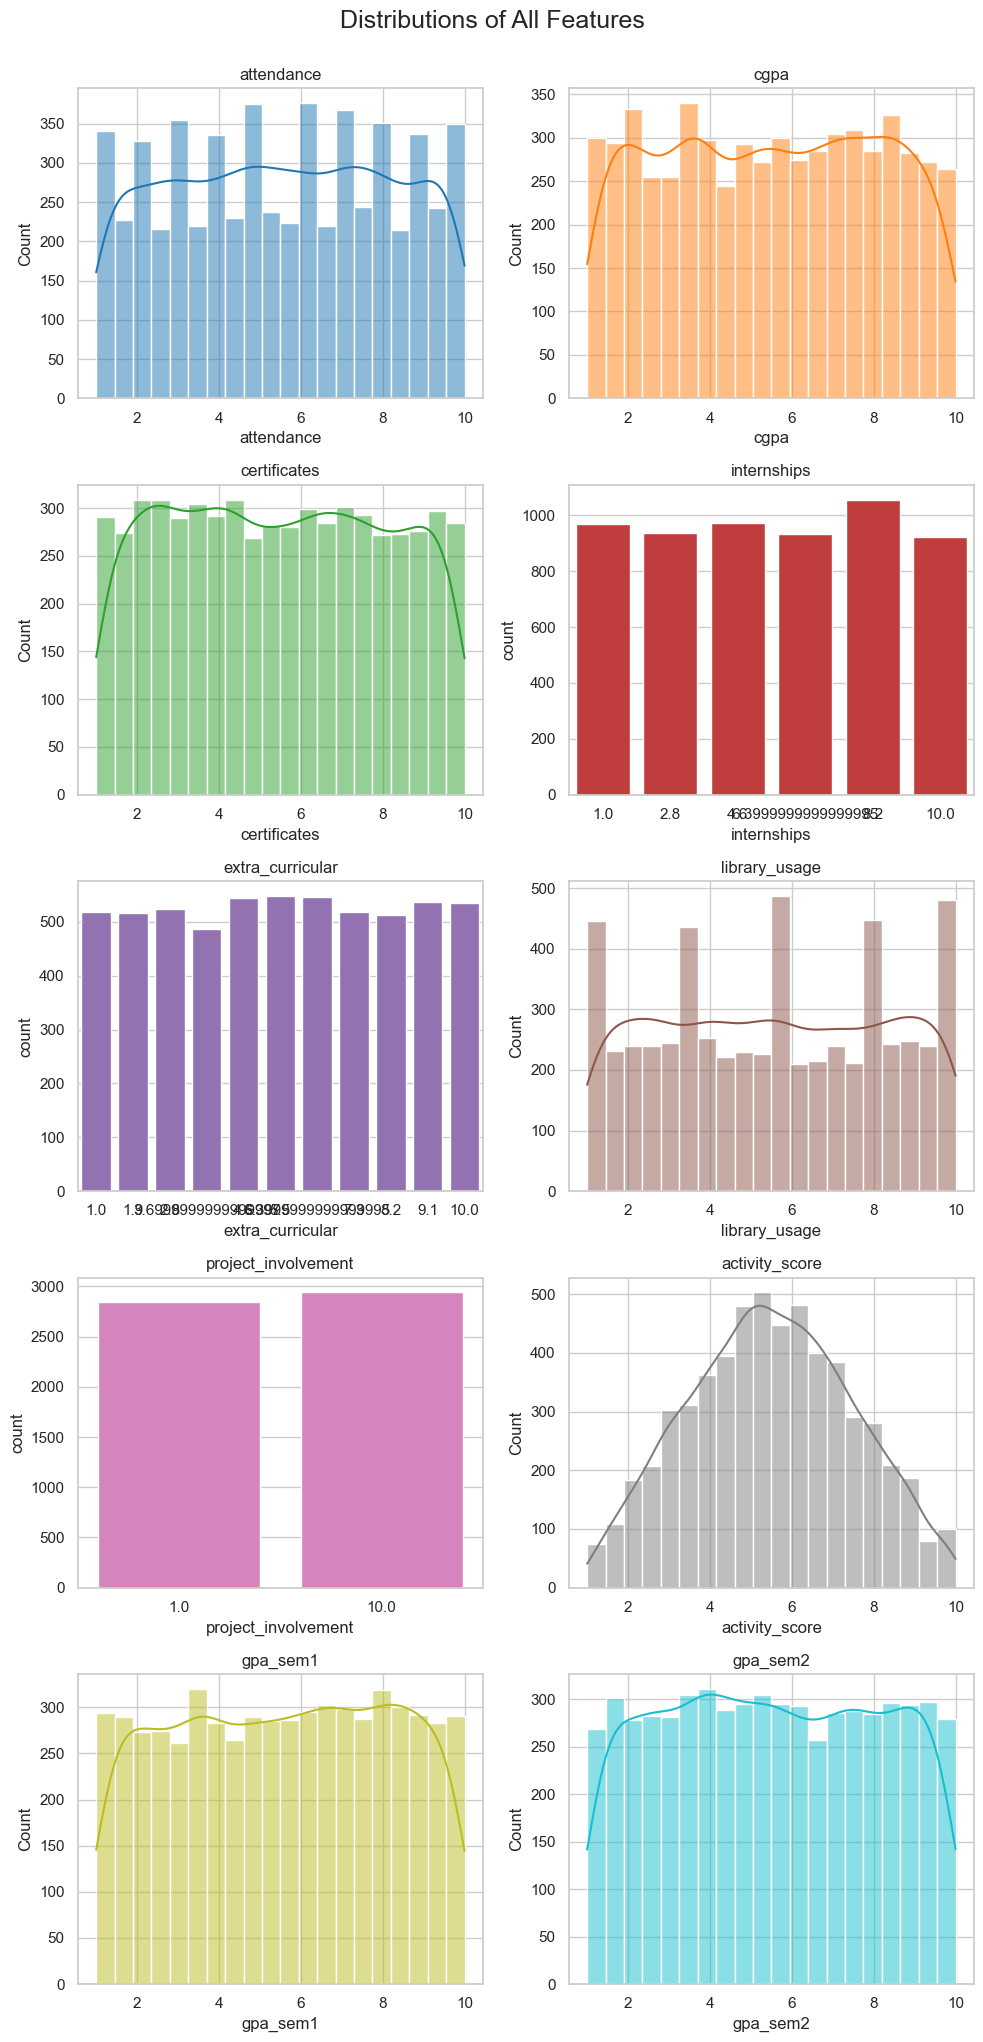

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

num_cols = len(features.columns)
rows, cols = 5, 2  # fixed layout

plt.figure(figsize=(cols * 5, rows * 4))  # adjust size accordingly

# Create a color palette with enough distinct colors
palette = sns.color_palette("tab10", n_colors=num_cols)

for i, col in enumerate(features.columns):
    plt.subplot(rows, cols, i + 1)
    color = palette[i % len(palette)]  # cycle colors if needed
    
    if features[col].nunique() < 15:
        sns.countplot(x=col, data=features, color=color)
    else:
        sns.histplot(features[col], kde=True, bins=20, color=color)
    
    plt.title(col)
    plt.tight_layout()

plt.suptitle("Distributions of All Features", fontsize=18, y=1.02)
#plt.savefig("Distributions of All Features", dpi=300)
plt.show();

In [14]:
features = features.drop(columns='activity_score')

In [15]:
features.head()

,attendance,cgpa,certificates,internships,extra_curricular,library_usage,project_involvement,gpa_sem1,gpa_sem2
0,7.979592,6.832,4.024,4.6,3.7,4.375,1.0,2.242,5.104
1,6.142857,3.466,5.887,6.4,1.9,9.625,10.0,5.374,4.348
2,3.571429,2.602,2.728,4.6,5.5,3.625,10.0,8.614,2.026
3,8.714286,3.646,5.833,6.4,5.5,2.875,10.0,1.900,3.070
4,2.285714,2.026,3.511,2.8,10.0,8.125,10.0,7.102,2.836


In [16]:
def calculate_activity_score(row):
    weights = {
        'attendance': 0.15,
        'cgpa': 0.2,
        'certificates': 0.1,
        'internships': 0.15,
        'extra_curricular': 0.05,
        'library_usage': 0.1,
        'project_involvement': 0.15,
        'gpa_sem1': 0.05,
        'gpa_sem2': 0.05
    }
    
    score = (
        row['attendance'] * weights['attendance'] +
        row['cgpa'] * weights['cgpa'] +
        row['certificates'] * weights['certificates'] +
        row['internships'] * weights['internships'] +
        row['extra_curricular'] * weights['extra_curricular'] +
        row['library_usage'] * weights['library_usage'] +
        row['project_involvement'] * weights['project_involvement'] +
        row['gpa_sem1'] * weights['gpa_sem1'] +
        row['gpa_sem2'] * weights['gpa_sem2']
    )
    return round(score, 2)

In [17]:
features['activity_score'] = features.apply(calculate_activity_score, axis=1)

In [18]:
features.isnull().sum()

attendance             0
cgpa                   0
certificates           0
internships            0
extra_curricular       0
library_usage          0
project_involvement    0
gpa_sem1               0
gpa_sem2               0
activity_score         0
dtype: int64

In [19]:
features.describe()

,attendance,cgpa,certificates,internships,extra_curricular,library_usage,project_involvement,gpa_sem1,gpa_sem2,activity_score
count,5786.000000,5786.000000,5786.000000,5786.000000,5786.000000,5786.000000,5786.000000,5786.000000,5786.000000,5786.000000
mean,5.536347,5.468517,5.459816,5.515555,5.529399,5.524240,5.574663,5.540707,5.498009,5.514563
std,2.635743,2.602573,2.594694,3.064702,2.840407,2.716208,4.499769,2.594641,2.587272,1.148569
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.060000
25%,3.204082,3.250000,3.205000,2.800000,2.800000,3.250000,1.000000,3.322000,3.304000,4.692500
50%,5.591837,5.500000,5.446000,6.400000,5.500000,5.500000,10.000000,5.590000,5.446000,5.500000
75%,7.795918,7.714000,7.669000,8.200000,8.200000,7.750000,10.000000,7.804000,7.750000,6.320000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,8.780000


In [23]:
def classify_risk(score):
    if score >= 7.5:
        return 'Very Low Risk'
    elif score >= 6:
        return 'Low Risk'
    elif score >= 4:
        return 'Moderate Risk'
    elif score >= 3:
        return 'High Risk'
    else:
        return 'Very High Risk'

features['risk'] = features['activity_score'].apply(classify_risk)

In [24]:
features['risk'].value_counts()

risk
Moderate Risk     3249
Low Risk          1742
High Risk          489
Very Low Risk      243
Very High Risk      63
Name: count, dtype: int64

In [25]:
features.head()

,attendance,cgpa,certificates,internships,extra_curricular,library_usage,project_involvement,gpa_sem1,gpa_sem2,activity_score,risk
0,7.979592,6.832,4.024,4.6,3.7,4.375,1.0,2.242,5.104,4.80,Moderate Risk
1,6.142857,3.466,5.887,6.4,1.9,9.625,10.0,5.374,4.348,6.21,Low Risk
2,3.571429,2.602,2.728,4.6,5.5,3.625,10.0,8.614,2.026,4.69,Moderate Risk
3,8.714286,3.646,5.833,6.4,5.5,2.875,10.0,1.900,3.070,5.89,Moderate Risk
4,2.285714,2.026,3.511,2.8,10.0,8.125,10.0,7.102,2.836,4.83,Moderate Risk


In [26]:
X = features.drop(columns=['activity_score', 'risk'])
y = features['activity_score']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [31]:
y_pred = rfr.predict(X_test)

In [32]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 0.05
R² Score: 0.96


In [33]:
X = features.drop(columns=['risk'])
y = features['risk']

In [36]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label mapping:", label_mapping)

Label mapping: {'High Risk': 0, 'Low Risk': 1, 'Moderate Risk': 2, 'Very High Risk': 3, 'Very Low Risk': 4}


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)